In [1]:
###################################################################################################
###================================== Beans in Grain Analysis====================================##
###################################################################################################

# Install pandas on ambient mode
# After you install, don't neet use this again

# No momento da criação do notebook, o ambiente padrão não conta com todos as bibliotecas necessárias
# para realização desta atividade. Dessa forma, foi feita a instalação das bibliotecas elencadas abaixo

import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pdmongo
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pdmongo

####################################################################################################

#!/usr/bin/env python
import pymongo
import pandas as pd
import json
import io
import requests
import pprint
import numpy as np
import urllib
from pymongo import MongoClient
from pprintpp import pprint
import warnings
import sys
import seaborn as sns
import pdmongo as pdm
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
mongoclient = MongoClient('localhost', 27017)

In [2]:
# Na célula abaixo, é realizado o upload do banco de dados que foi utilizado, que está hospedado no GitHub.

In [3]:
!wget https://raw.githubusercontent.com/KarlmerABC/MongoDB/master/Jupyter/Database/Prod_Beans_BRA.json

--2020-10-10 00:59:49--  https://raw.githubusercontent.com/KarlmerABC/MongoDB/master/Jupyter/Database/Prod_Beans_BRA.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 877146 (857K) [text/plain]
Saving to: ‘Prod_Beans_BRA.json.5’

Prod_Beans_BRA.json 100%[===================>] 856.59K  --.-KB/s    in 0.07s   

2020-10-10 00:59:50 (12.0 MB/s) - ‘Prod_Beans_BRA.json.5’ saved [877146/877146]



In [4]:
# É iniciado o banco de dados "Prod_Beans_BRA.json" com a atribuição de "trabalho"

In [5]:
!mongoimport --db trabalho --collection Prod_Beans_BRA --file Prod_Beans_BRA.json --jsonArray

2020-10-10T00:59:50.908+0000	connected to: mongodb://localhost/
2020-10-10T00:59:51.646+0000	3973 document(s) imported successfully. 0 document(s) failed to import.


In [6]:
# Nos próximos comandos são realizados o teste de conexão e a contagem dos elementos existentes

In [7]:
db = mongoclient.trabalho
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'trabalho')


In [8]:
! mongo --quiet --eval 'db.Prod_Beans_BRA.find().count();' trabalho

27811


In [9]:
Arg = [
            {"$unwind": "$State"},
            {"$group": {"_id": "$State", "count": {"$sum": "$RMP_kgha"}}},
            {"$sort":  {"count": -1}},
            {"$limit": 20} # Só para não ficar extenso
]

resultStates = db.Prod_Beans_BRA.aggregate(Arg)
list(resultStates)

[{'_id': 'SP', 'count': 4121348},
 {'_id': 'PR', 'count': 2295573},
 {'_id': 'MG', 'count': 2288370},
 {'_id': 'GO', 'count': 1888369},
 {'_id': 'SC', 'count': 1469769},
 {'_id': 'RS', 'count': 1349810},
 {'_id': 'RJ', 'count': 1058946},
 {'_id': 'MT', 'count': 1001756},
 {'_id': 'BA', 'count': 919681},
 {'_id': 'PA', 'count': 819497},
 {'_id': 'MS', 'count': 808325},
 {'_id': 'AM', 'count': 771029},
 {'_id': 'ES', 'count': 689577},
 {'_id': 'MA', 'count': 447104},
 {'_id': 'DF', 'count': 428106},
 {'_id': 'CE', 'count': 422534},
 {'_id': 'PE', 'count': 396431},
 {'_id': 'SE', 'count': 354564},
 {'_id': 'RN', 'count': 322567},
 {'_id': 'TO', 'count': 297038}]

In [10]:
##===============================================================================================================##

In [11]:
# Uma das análises realizadas é referente a produção de feijão por macro região (CO, N, NE, NO, S, SE)
# Assim, saberemos qual foi a região que obteve a maior média durante o período de análise (1990-2018) e 
# também aquele teve maior aumento de produção nesse período.

In [12]:
# Os próximos comandos são responsáveis por manipular o JSON e transformá-lo em um dataframe que será 
# explorado adiante.

In [13]:
result = db.Prod_Beans_BRA.find({}).limit(3973)
list_cur = list(result)

In [14]:
from pandas import DataFrame
df = DataFrame(list_cur)

In [15]:
df.head()

,_id,Meso_region_geo,State,Macro_region_geo,Year,AP_ha,AC_ha,QP_ton,RMP_kgha,VP_pct
0,5f80ead7af557d9c6de9d72e,Vale do Juruá,AC,NO,1990,1109.0,1109.0,614.0,553.0,2.03
1,5f80ead7af557d9c6de9d72f,Vale do Acre,AC,NO,1990,11690.0,11690.0,6762.0,578.0,8.97
2,5f80ead7af557d9c6de9d730,Vale do Acre,AC,NO,1991,14271.0,14271.0,10025.0,702.0,8.16
3,5f80ead7af557d9c6de9d731,Vale do Juruá,AC,NO,1992,1103.0,1103.0,629.0,570.0,3.84
4,5f80ead7af557d9c6de9d732,Vale do Acre,AC,NO,1992,14343.0,14343.0,9766.0,680.0,8.97


In [16]:
# O gráfico a seguir mostra a produção média de feijão (em toneladas) das macro regiões no período de análise.
# Nota-se que a macro região sul possui a maior produção média e as regiões norte e noroeste as menores produções.

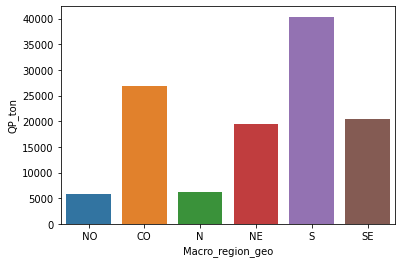

In [17]:
df_2=df.groupby('Macro_region_geo').mean()
df_2.reset_index(inplace=True)
sns.barplot(x='Macro_region_geo', y='QP_ton', data=df_2);

In [18]:
# No próximo gráfico, é possível fazer algumas análises interessantes.

#1. A primeira análise a ser realizada é sobre a região CENTRO-OESTE, esta foi a região que obteve o MAIOR aumento de produção
# durante o período.

#2. A segunda análise é sobre a região NOROESTE que mesmo com uma proodução baixa, apresentou QUEDA no decorrer dos anos.

#3. A terceira análise é sobre a região SUL que NÃO TEVE GRANDES VARIAÇÕES, mantendo uma ALTA produção ao longo dos anos.

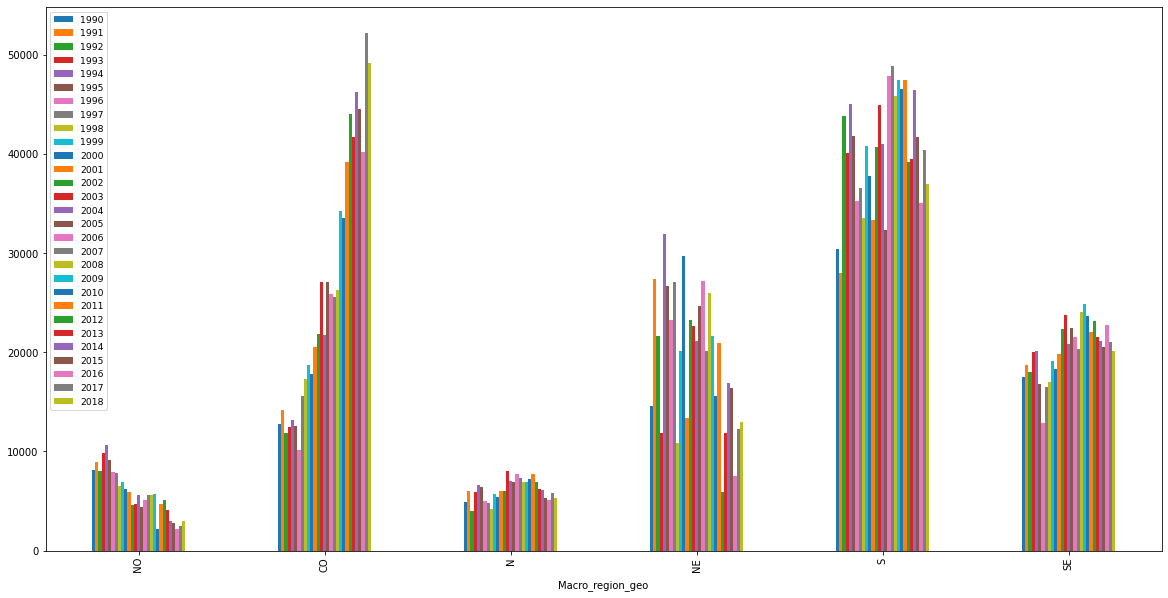

In [19]:
temp2 = df.pivot_table(values='QP_ton',index='Macro_region_geo',columns='Year')
#temp2.plot

#change Figure size
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (10,6)
ax = temp2.plot.bar(figsize=(20,10))

h,l = ax.get_legend_handles_labels()
ax.legend(h[:29],["1990", "1991", "1992","1993","1994","1995","1996",
                "1997","1998","1999","2000","2001","2002","2003","2004",
                "2005","2006","2007","2008","2009","2010","2011","2012",
                "2013","2014","2015","2016","2017","2018"], loc=2, fontsize=9.3)

In [20]:
soma = [
            {"$unwind": "$Macro_region_geo"},
            {"$group": {"_id": "$Macro_region_geo", "count": {"$sum": "$QP_ton"}}},
            {"$sort":  {"count": -1}}
    
]


result = db.Prod_Beans_BRA.aggregate(soma)
list(result)

[{'_id': 'S', 'count': 188326908},
 {'_id': 'SE', 'count': 153177374},
 {'_id': 'NE', 'count': 145546877},
 {'_id': 'CO', 'count': 81694872},
 {'_id': 'N', 'count': 18652816},
 {'_id': ' NO', 'count': 11607904}]

In [21]:
# RMP_kgha = Rendimento Médio da Produção kg/ha

# 1.Podemos observar que três regiões (CO, S, SE) tiveram um grande aumento de produtividade, enquanto que as demais regiões 
# ou apresentaram estabilidade ou um pequeno aumento de produtividade.



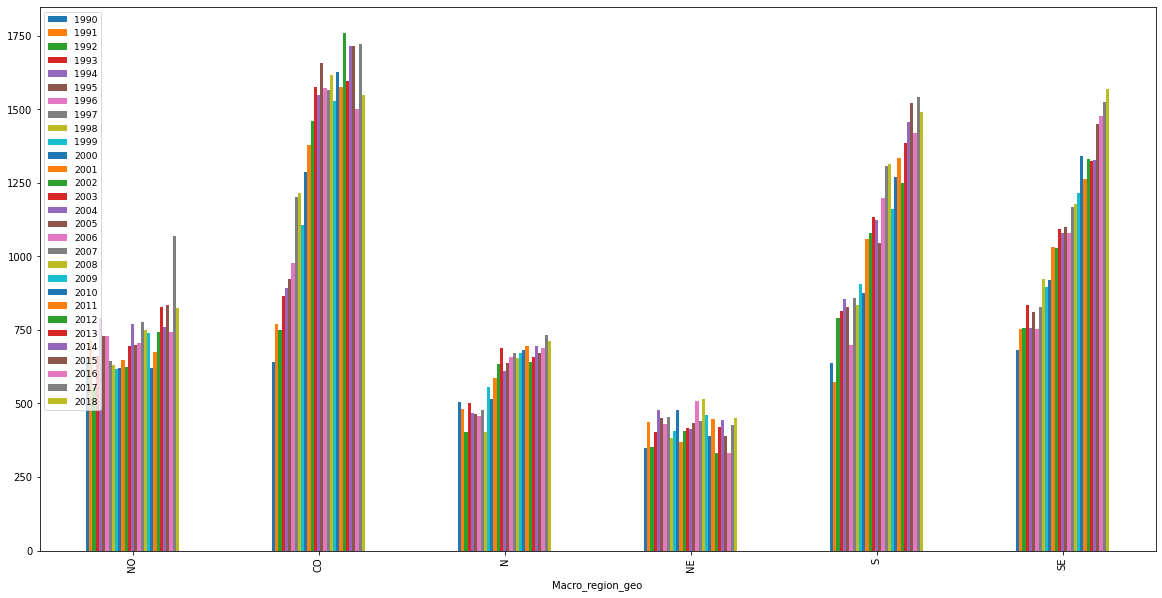

In [22]:
temp2 = df.pivot_table(values='RMP_kgha',index='Macro_region_geo',columns='Year')
#temp2.plot

#change Figure size
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (10,6)
ax = temp2.plot.bar(figsize=(20,10))

h,l = ax.get_legend_handles_labels()
ax.legend(h[:29],["1990", "1991", "1992","1993","1994","1995","1996",
                "1997","1998","1999","2000","2001","2002","2003","2004",
                "2005","2006","2007","2008","2009","2010","2011","2012",
                "2013","2014","2015","2016","2017","2018"], loc=2, fontsize=9.3)

In [25]:
Arg = [
            {"$unwind": "$State"},
            {"$group": {"_id": "$State", "count": {"$avg": "$RMP_kgha"}}},
            {"$sort":  {"count": -1}},
            {"$limit": 20} # Só para não ficar extenso
]

resultStates = db.Prod_Beans_BRA.aggregate(Arg)
list(resultStates)

[{'_id': 'DF', 'count': 2108.896551724138},
 {'_id': 'GO', 'count': 1860.4620689655173},
 {'_id': 'SP', 'count': 1353.480459770115},
 {'_id': 'SC', 'count': 1206.7068965517242},
 {'_id': 'PR', 'count': 1130.8241379310346},
 {'_id': 'MS', 'count': 995.4741379310345},
 {'_id': 'MT', 'count': 986.951724137931},
 {'_id': 'AM', 'count': 957.8},
 {'_id': 'RS', 'count': 949.9014778325123},
 {'_id': 'MG', 'count': 939.3965517241379},
 {'_id': 'RJ', 'count': 869.4137931034483},
 {'_id': 'ES', 'count': 849.2327586206897},
 {'_id': 'TO', 'count': 731.6206896551724},
 {'_id': 'PA', 'count': 672.8218390804598},
 {'_id': 'BA', 'count': 647.2068965517242},
 {'_id': 'AP', 'count': 603.2586206896551},
 {'_id': 'RO', 'count': 588.8275862068965},
 {'_id': 'SE', 'count': 582.2068965517242},
 {'_id': 'AC', 'count': 564.8103448275862},
 {'_id': 'RR', 'count': 519.3214285714286}]

In [ ]:
# AP = Área Plantada
# 1.O Centro-oeste aumentou pouco a área plantada, no entanto, houve um aumento expressivo em sua produtividade devido à 
# agricultura de precisão.

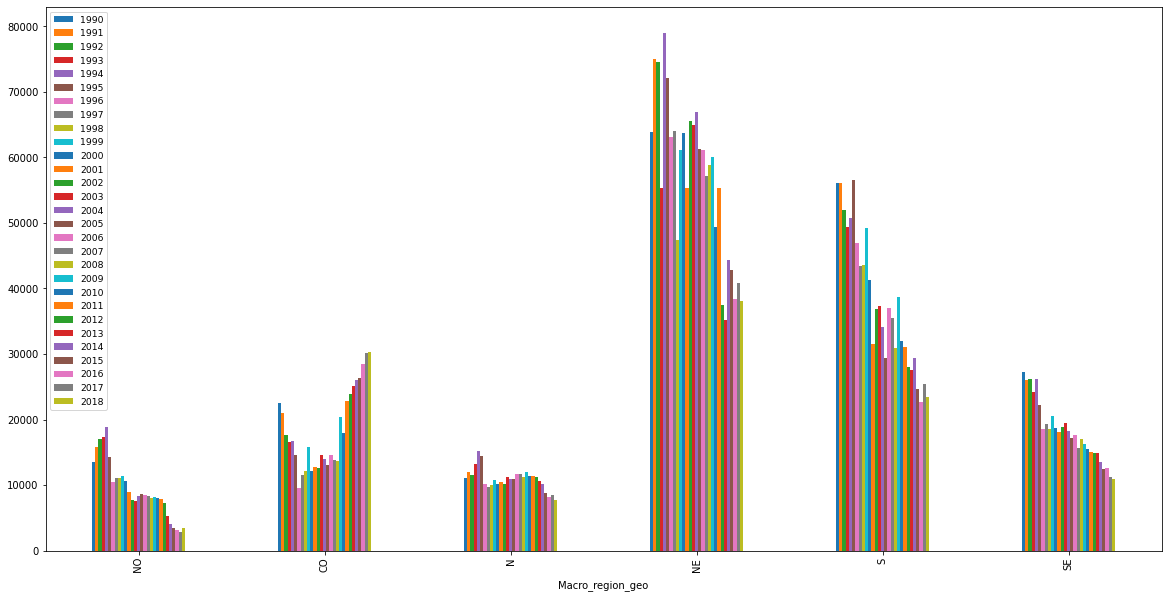

In [26]:
temp2 = df.pivot_table(values='AP_ha',index='Macro_region_geo',columns='Year')
#temp2.plot

#change Figure size
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (10,6)
ax = temp2.plot.bar(figsize=(20,10))

h,l = ax.get_legend_handles_labels()
ax.legend(h[:29],["1990", "1991", "1992","1993","1994","1995","1996",
                "1997","1998","1999","2000","2001","2002","2003","2004",
                "2005","2006","2007","2008","2009","2010","2011","2012",
                "2013","2014","2015","2016","2017","2018"], loc=2, fontsize=9.3)

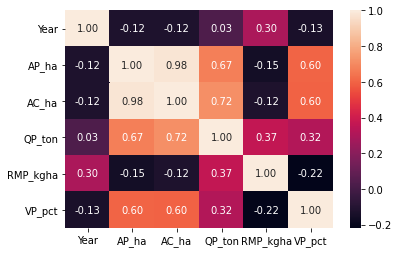

In [24]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()